# Binomial Distribution in Python

Date: 2020-10-29

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

## Scenario

A company specialises in chartering flights from Narnia.
The company is concerned about the rise in sky mermaids that have been spotted by the crew of the flights, as a collision could be disasterous.
The flight crew estimates that there is a 17% chance of spotting a sky mermaid during a flight.

In 20XX, the company is scheduled to fly 18 flights from Narnia.
It may be assumed that the event of spotting a sky mermaid is independent of any other event.

-----

## Questions

**(a)** What is the model that describes the number of sky mermaids spotted out of the 18 flights?

**(b)** Construct a table showing the p.m.f. and c.d.f. of the distribution.

**(c)** Plot the probability distribution.

**(d)** Calculate the mean and variance of the distribution.

**(e)** What is the probability that five flights will spot sky mermaids in 20XX?

**(f)** What is the probability four or fewer flights will spot sky mermaids in 20XX?

**(g)** What is the probability that more than four flights will spot sky mermaids in 20XX?

-----

### (a)

Let $X$ be a random variable that represents the number of times a sky mermaid is spotted during the flights from Narnia over the year.
Then $X$ is modelled by a **binomial distribution**, with parameters $n$ being the number of flights flown, and $p=0.17$.

In 20XX, $X \sim B(18,0.17)$.

In [2]:
# declare the distribution
x = stats.binom(n=18, p=0.17)

### (b)

We'll disply the p.d.f. and c.d.f. using a pandas **DataFrame**.

In [3]:
# declare an array
range_x = np.arange(start=0, stop=19, step=1)

In [4]:
# declare a DataFrame to hold the pdf and cdf
df_mermaids = pd.DataFrame(data=range_x, columns={'x'})

In [5]:
# append pmf and cdf to df
df_mermaids['p(x)'] = x.pmf(df_mermaids['x'])
df_mermaids['F(x)'] = x.cdf(df_mermaids['x'])

In [6]:
# view the dataframe
df_mermaids

,x,p(x),F(x)
0,0,3.494666e-02,0.034947
1,1,1.288395e-01,0.163786
2,2,2.243049e-01,0.388091
3,3,2.450238e-01,0.633115
4,4,1.881960e-01,0.821311
5,5,1.079293e-01,0.929240
6,6,4.789633e-02,0.977136
7,7,1.681730e-02,0.993954
8,8,4.736197e-03,0.998690
9,9,1.077849e-03,0.999768


### (c)

[Text(0.5, 1.0, 'Probability distribution: B(18, 0.17)'), Text(0, 0.5, 'p(x)')]

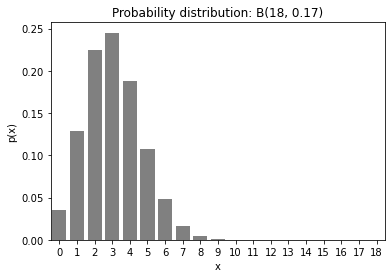

In [7]:
fig1 = sns.barplot(data=df_mermaids,
                   x='x',
                   y='p(x)',
                   color='grey')

fig1.set(title="Probability distribution: B(18, 0.17)",
         ylabel="p(x)")

### (d)

The mean and variance of the binomial distribution

$$
\begin{aligned}
    E(X) &= np, \\
    V(X) &= np(1-p).
\end{aligned}
$$

In [8]:
x.mean()

3.06

In [9]:
x.var()

2.5398

### (e)

The probability $P(X=x)$ for a binomial distribution is

$$
P(X=x) = p(x) = \binom{n}{x} p^{x} (1-p)^{n-x}.
$$

So the probability that five flights will spot sky mermaids in 20XX is

$$
P(X=5) = \binom{18}{5} (0.17)^{5} (0.83)^{13} = \ldots
$$

In [10]:
x.pmf(k=5)

0.10792927645305388

### (f)

The probability $P(X \leq x)$ for a binomial distribution is

$$
P(X \leq x) = F(x) = \sum_{k = 0}^{x} \binom{n}{k} p^{k} (1-p)^{n - k}.
$$

So the probability four or fewer flights will spot sky mermaids in 20XX is

$$
P(X \leq 4) = F(4) = \sum_{k = 0}^{4} \binom{18}{k} (0.17)^{k} (0.83)^{18 - k} = \ldots
$$

In [11]:
x.cdf(x=4)

0.8213108726294348

### (g)

The probability that more than four flights will spot sky mermaids in 20XX is

$$
P(X > 4) = 1 - F(4) = 1 - \sum_{k = 0}^{4} \binom{18}{k} (0.17)^{k} (0.83)^{18 - k} = \ldots
$$

In [12]:
1 - x.cdf(x=4)

0.1786891273705652

Note that method `sf()` is the **shadow function**.
It is defined as $1-F(x)$.

In [13]:
x.sf(x=4)

0.17868912737056494

In [16]:
tut = stats.binom(p=0.06, n=25)

In [18]:
tut.sf(x=1)

0.4473396436309281

In [19]:
tut1 = stats.geom(p=0.04)

In [20]:
tut1.sf(x=25)

0.3603967168580183

In [21]:
tut2 = stats.poisson(mu=0.75)

In [22]:
tut2.sf(x=1)

0.17335853270322427